![logo](./img/LogoLine_horizon_C3S.png)

<br>

# Tutorial on Climatologies using Climate Data from C3S

### About

In this tutorial we will access data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), and analyse climatologies and trends in near-surface air temperature. The tutorial comprises the following steps:

1. Search, download and view data
2. Calculate a climate normal
3. Visualise anomalies with respect to the normal
4. Calculate monthly climatology and anomalies
5. View time series and analyse trends

![logo](./img/climatology_banner.png)

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s/main?labpath=reanalysis-climatology.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-climatology.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-climatology.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>

<br>

## 1. Search, download and view data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [1]:
!pip install cdsapi

#### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

#### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (http://cds.climate.copernicus.eu), then visit https://cds.climate.copernicus.eu/api-how-to and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [1]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '##################################'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [2]:
DATADIR = './data'

#### Search for data

To search for data, visit the CDS website: http://cds.climate.copernicus.eu.
Here you can search for ERA5 data using the search bar. The data we need for this tutorial is the [ERA5 monthly averaged data on single levels from 1979 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview). ERA5 is the 5th version of the ECMWF Reanalysis dataset. Reanalysis uses a state of the art forecast model and data assimilation system to create a consistent "map without gaps" of observed and modelled climate variables over the past decades.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download:

- Product type: `Monthly averaged reanalysis`
- Variable: `2m temperature`
- Year: `1979 to year before present`
- Month: `all`
- Time: `00:00` (default)
- Geographical area: `Europe` 
- Format: `NetCDF`

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

#### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **"Show API request"** option.

In [3]:
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            45, 25, 35,
            45,
        ],
        'data_format': 'netcdf_legacy',
    },
    f'{DATADIR}era5_monthly_t2m_tr.nc')

2024-10-07 16:19:04,035 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-07 16:19:04,051 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative page](https://confluence.ecmwf.int/x/uINmFw) for guidance.
2024-10-07 16:19:04,051 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-10-07 16:19:04,051 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-10-07 16:19:04,051 WARNING [2024-06-16T

b3c577ed86afa779134350e92f56a0c8.nc:   0%|          | 0.00/3.20M [00:00<?, ?B/s]

'./dataera5_monthly_t2m_tr.nc'

#### Inspect data

Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the [Xarray](http://xarray.pydata.org/en/stable/) library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an [xarray.Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [13]:
t2m = f'{DATADIR}era5_monthly_t2m_tr.nc'

In [14]:
# Create Xarray Dataset
ds = xr.open_dataset(t2m)

Now we can query our newly created Xarray dataset ...

In [15]:
ds

<xarray.Dataset> Size: 13MB
Dimensions:    (longitude: 81, latitude: 41, time: 504)
Coordinates:
  * longitude  (longitude) float32 324B 25.0 25.25 25.5 ... 44.5 44.75 45.0
  * latitude   (latitude) float32 164B 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    t2m        (time, latitude, longitude) float64 13MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-10-07 12:33:57 GMT by grib_to_netcdf-2.36.0: grib_to_n...

We see that the dataset has one variable called **"t2m"**, which stands for "2 metre temperature", and three coordinates of **longitude**, **latitude** and **time**.

#### Convert longitude to [-180, 180] grid

Notice that the `longitude` variables in the Xarray Dataset and Data Array objects are in the range of `[0, 359.75]`. By default, ECMWF data are on a [0, 360] grid. Should you wish to, there are two options to bring the longitude coordinates to a `[-180, 180]` grid. The first option, in case you already have the data downloaded, is to assign values to coordinates with the xarray function `assign_coords()`. The code below shifts your longitude coordinates from `[0, 359.75]` to `[-180, 179.75]`.

The second option is to specify the `area` keyword argument right when you request data with the `CDS API`. The `area` keyword then automatically reprojects the requested data onto a [-180, 180] grid.

In [16]:
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

While an Xarray **dataset** may contain multiple variables, an Xarray **data array** holds a single multi-dimensional variable and its coordinates. To make the processing of the **t2m** data easier, we convert in into an Xarray data array.

In [17]:
# Create Xarray Data Array
da = ds_180['t2m']

Let's view this data:

In [18]:
da

<xarray.DataArray 't2m' (time: 504, latitude: 41, longitude: 81)> Size: 13MB
[1673784 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 164B 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-12-01
  * longitude  (longitude) float32 324B 25.0 25.25 25.5 ... 44.5 44.75 45.0
Attributes:
    units:      K
    long_name:  2 metre temperature

#### Change temperature units from Kelvin to Celsius

Notice that the ERA-5 temperature data are in units of `Kelvin`, the base unit for temperature in the International System of Units (SI). If you want to convert the values from `Kelvin` to `degrees Celsius`, you have to subtract 273.15.

In [19]:
da_degc = da - 273.15

If you inspect the characteristics of the data above, you see that when you convert the data values, the data array's Attributes are dropped. However, we want to keep the information provided by the Attributes and for this reason, we re-assign the attributes from the previous, unconverted object with the function assign_attrs(). Since the unit has changed, we assign a new unit measure to the units attribute.

In [20]:
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'

#### Plot data

Now, let us visualize one time step to get a better idea of the data. xarray offers built-in matplotlib functions that allow you to plot a `DataArray`. With the function `plot()`, you can easily plot e.g. the first time step of the loaded array.

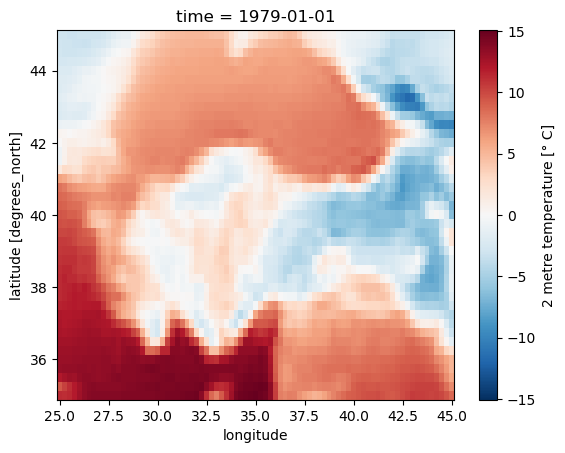

In [21]:
da_degc[0,:,:].plot()

An alternative to the built-in xarray plotting functions is to make use of a combination of the plotting libraries [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/). One of Cartopy's key features is its ability to transform array data into different geographic projections. In combination with matplotlib, it is a very powerful way to create high-quality visualisations and animations. In later plots, we will make use of these libraries to produce more customised visualisations.

## 2. Calculate climate normals

#### Standard reference period and climate normals

Anthropogenic activities and natural variations from years to decades shape the Earth's climate. In order to evaluate anomalous conditions of a specific month or year, the World Meteorological Organization (WMO) defines `standard reference periods` used to create `climate normals`. `Climate normals` can be considered as the typical climate for the period the normals are based on.

Until 2020, the most current and widely used standard reference period was the 30-year range of 1981-2010. With the start of 2021, the WMO recommended updating the climate normal reference period to the range 1991-2020.

First, let us calculate the near-surface air temperature climate normal for the reference period 1991-2020. For this, we will create for each year the average near-surface air temperature. You can use the xarray function `groupby()` to group the data by year (specify `time.year`) and then to create the average of each year with the function `mean()`. The resulting object contains for each year from 1979 to 2020 the average annual global mean surface air temperature.

In [22]:
yearly_mean = da_degc.groupby('time.year').mean(keep_attrs=True)

In [23]:
yearly_mean.head()

<xarray.DataArray 't2m' (year: 5, latitude: 5, longitude: 5)> Size: 1kB
array([[[ 9.11228185,  8.90176717,  9.00437096,  9.3808797 ,
          9.98721504],
        [10.07559287, 10.09232496, 10.36586136, 10.64065082,
         10.7983157 ],
        [10.78018313, 10.75718573, 10.80944585, 10.87703757,
         11.0296902 ],
        [11.26327599, 11.29290725, 11.36462671, 11.40752571,
         11.48130904],
        [11.50194774, 11.56032575, 11.67538647, 11.78882558,
         11.9077192 ]],

       [[ 8.2346214 ,  7.95622016,  7.99477029,  8.2990436 ,
          8.86557575],
        [ 9.20596677,  9.15997197,  9.36223117,  9.55903585,
          9.62397403],
        [ 9.87001674,  9.78252342,  9.77485762,  9.73151637,
          9.78340794],
        [10.37109474, 10.31448575, 10.31242188, 10.19271746,
         10.14731233],
        [10.75836509, 10.68900433, 10.65620355, 10.59060199,
...
          9.95765748],
        [10.11296365, 10.10117011, 10.38893247, 10.68487659,
         10.84939647],
        [10.84018276, 10.77745588, 10.80354908, 10.86207452,
         11.01929714],
        [11.27772307, 11.2695413 , 11.3469364 , 11.29135935,
         11.30359515],
        [11.67774518, 11.59806508, 11.56688591, 11.53931851,
         11.57351978]],

       [[ 9.52910975,  9.23493465,  9.26758802,  9.59478502,
         10.18291408],
        [10.6657858 , 10.55573734, 10.7622717 , 11.00204909,
         11.12050045],
        [11.6372786 , 11.47231647, 11.37192397, 11.34973737,
         11.45595293],
        [12.13290209, 12.06501553, 12.03811151, 11.953714  ,
         11.91884935],
        [12.44145056, 12.35388353, 12.29830647, 12.33368709,
         12.33501386]]])
Coordinates:
  * latitude   (latitude) float32 20B 45.0 44.75 44.5 44.25 44.0
  * longitude  (longitude) float32 20B 25.0 25.25 25.5 25.75 26.0
  * year       (year) int64 40B 1979 1980 1981 1982 1983
Attributes:
    units:      ° C
    long_name:  2 metre temperature

From the data array object above, we can then filter the years of the reference period with the function `where()`. Inside the function, you can filter on the data dimensions. In the example below, we will apply a filter to keep data for all years in the range 1991 to 2020.

In [24]:
ref = yearly_mean.where((yearly_mean.year > 1990) & (yearly_mean.year < 2021), drop=True)

In a last step, we want to create the average of the yearly-mean near-surface air temperature for the reference period 1991-2020. We can do this by applying the function `mean()` and specify the dimension `year` as the dimension to be averaged. The resulting data array is left with two dimensions, latitude and longitude.

In [25]:
ref_mean = ref.mean(dim="year", keep_attrs=True)

## 3. Anomaly calculation

The next step is now to calculate the anomaly of a specific year with respect to the climate normal. The term anomaly refers to the deviation of a value from the long-term average. Positive or negative anomalies indicate that the average temperatures of a particular year were respectively warmer or cooler than the reference value.

Let us calculate the near-surface air temperature anomaly for the year 2016. In a first step, we select the average near-surface temperature values for the year 2016 from the xarray.DataArray object `yearly_mean`. With the xarray function `sel()`, you can select a data array based on coordinate labels. The coordinate label of interest is `year=2016`.

In [26]:
t2m_2016 = yearly_mean.sel(year=2016)

Next, we calculate the near-surface air temperature anomaly for 2016 by subtracting the climate normal (i.e. the reference near-surface air temperature values) from the average near-surface air temperature for 2016.

In [27]:
anom_2016 = t2m_2016 - ref_mean

Let's visualize the global near-surface air temperature anomaly for 2016 to see which regions were warmer or cooler compared to the reference period. This time we will make use of a combination of the plotting libraries [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) to create a more customised figure. One of Cartopy's key features is its ability to transform array data into different geographic projections. In combination with matplotlib, it is a very powerful way to create high-quality visualisations and animations.

D:\Miniconda3\envs\message_env\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


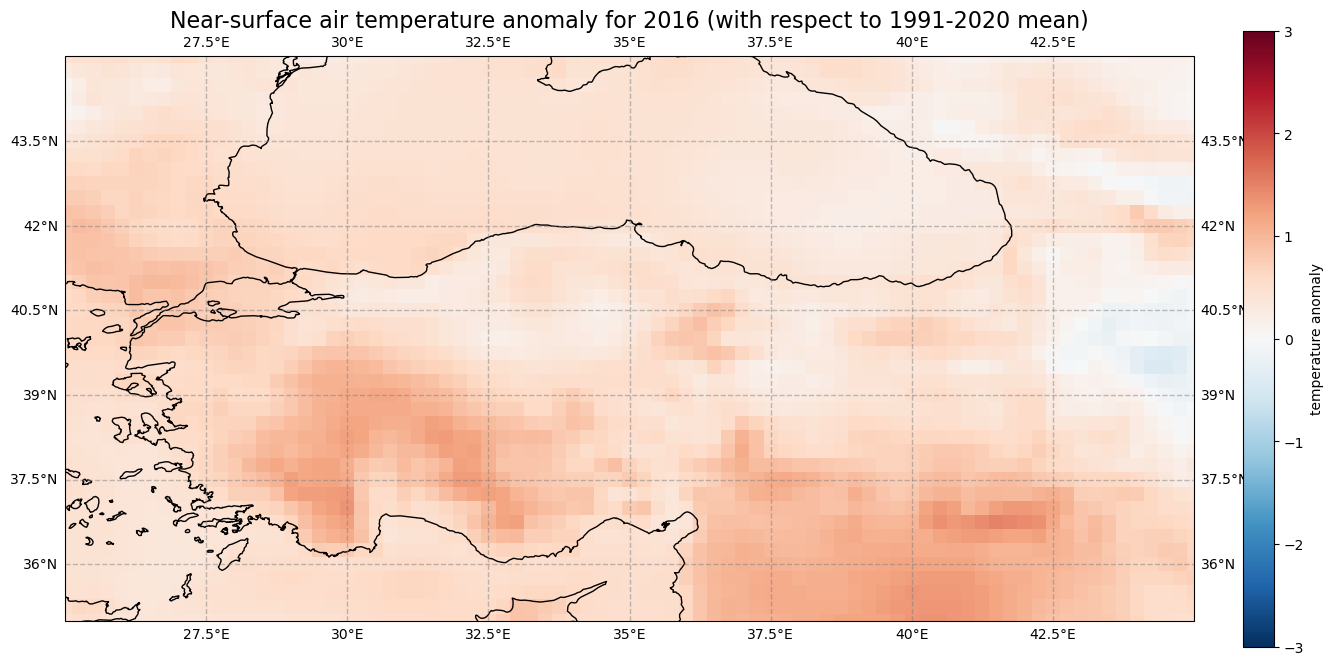

In [29]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(anom_2016.longitude, anom_2016.latitude, anom_2016, cmap='RdBu_r', vmin=-3, vmax=3) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Near-surface air temperature anomaly for 2016 (with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([25, 45, 35, 45], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('temperature anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}ERA5_global_2016_anomaly_eur.png')

## 4. Calculate monthly climatology and anomalies

We will now calculate the monthly climatology of near-surface air temperature for the period 1991 to 2020. We will also view the anomalies with respect to the climatology for a particular month. To do this, we return to the data array created at the end of [section 1](#search_download).

We first create again a temporal subset for the period 1991 to 2020, but this time keeping the monthly temporal resolution.

In [30]:
clim_period = da_degc.sel(time=slice('1991-01-01', '2020-12-01'))

We will now calculate the monthly climatology by first applying the function `groupby()` to group the data array by month and then calculating the average for each monthly group. The resulting data array is the monthly climatology for air temperature in Europe based on the reference period 1991 to 2020.

In [31]:
clim_month = clim_period.groupby('time.month').mean()

Let us view this monthly climatology averaged over the entire European region. To do this we need to average over the latitude and longitude dimensions. A very important consideration however is that the gridded data cells do not all correspond to the same areas. The size covered by each data point varies as a function of latitude. We need to take this into account when averaging. One way to do this is to use the cosine of the latitude as a proxy for the varying sizes.

First, we calculate the weights by using the cosine of the latitude, then we apply these weights to the data array with the xarray function `weighted()`.

In [32]:
weights = np.cos(np.deg2rad(clim_month.latitude))
weights.name = "weights"
clim_month_weighted = clim_month.weighted(weights)

The next step is to compute the mean across the latitude and longitude dimensions of the weighted data array with the function `mean()`.

In [33]:
mean = clim_month_weighted.mean(["longitude", "latitude"])

This data array now gives us the monthly climatology of Europe for the period 1991 to 2020. We could create a simple plot of this:

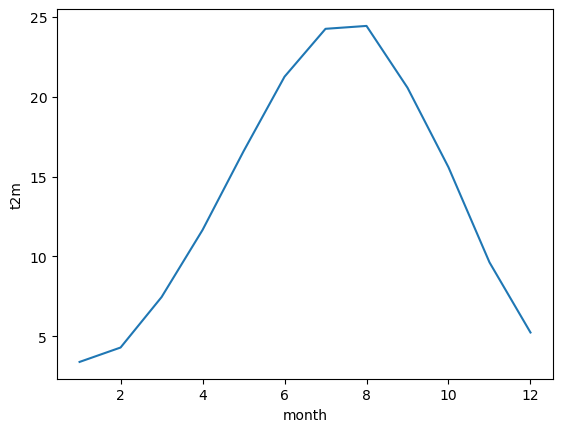

In [34]:
mean.plot()

One more step we can take is to repeat the process above for the standard deviation, to enable us to plot both in a single figure.

In [35]:
clim_std = clim_period.groupby('time.month').std()

weights = np.cos(np.deg2rad(clim_std.latitude))
weights.name = "weights"
clim_std_weighted = clim_std.weighted(weights)

std = clim_std_weighted.mean(["longitude", "latitude"])

We can now plot the European monthly climatology and standard deviation in a figure:

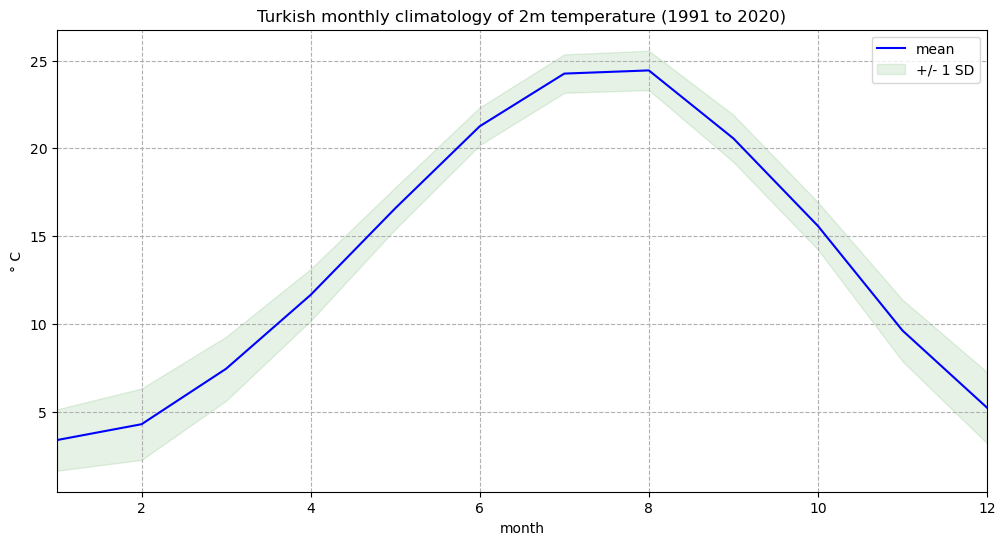

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.plot(mean.month, mean, color='blue', label='mean')
ax.fill_between(mean.month, (mean + std), (mean - std), alpha=0.1, color='green', label='+/- 1 SD')

ax.set_title('Turkish monthly climatology of 2m temperature (1991 to 2020)')
ax.set_ylabel('° C')
ax.set_xlabel('month')
ax.set_xlim(1,12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

fig.savefig(f'{DATADIR}Eur_monthly_t2m_clim.png')

#### Calculate monthly anomalies

We will now inspect monthly anomalies with respect to this climatology. We will return to the data that we created prior to aggregating by latitude and longitude. We can compute the monthly anomalies for each month of our original European time series by subtracting from it the monthly climatology. Important to mention here is to first group by `time.month`. In this way, xarray understands to use the correct value of the monthly climatology to calculate the anomalies.

In [37]:
anom_month = da_degc.groupby('time.month') - clim_month

#### Visualise Europen near-surface temperature anomalies for one specific month

The last step is to visualize the air temperature anomaly field in Europe for one specific month. In Europe, 2020 was the hottest year on record and the northwest has expierenced a heatwave during the second half of July and first half of August. Let us select the air temperature anomalies for August for each year from 1979 to 2020. Through the grouping process, the data array `anom_month` has `month` as additional coordinate information. Based on this coordinate information, you can specify that you only want to select the data array entries for August (month = 8).

In [38]:
anom_aug = anom_month[anom_month.month == 8]

Now let us visualise the near-surface air temperature anomaly for Europe in August 2020. Again we make use of the function `visualize_pcolormesh`.

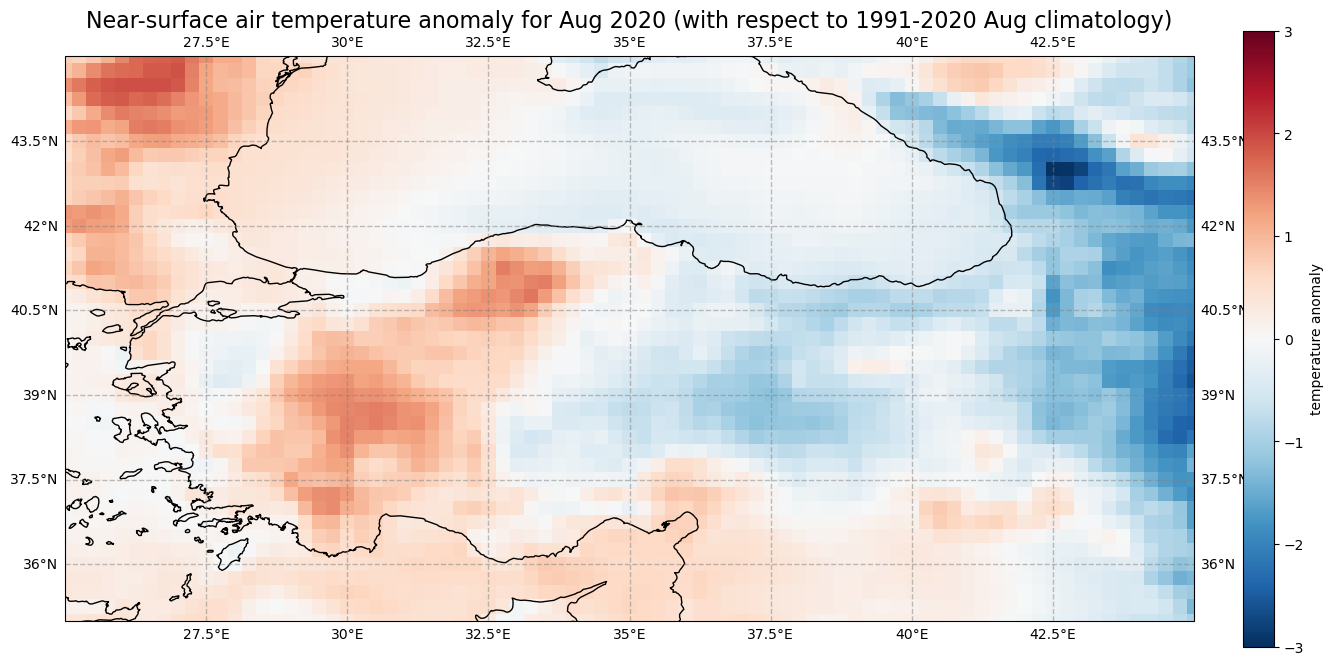

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(anom_aug.longitude, anom_aug.latitude, anom_aug[41,:,:], cmap='RdBu_r', vmin=-3, vmax=3) 

ax.set_title('Near-surface air temperature anomaly for Aug 2020 (with respect to 1991-2020 Aug climatology)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([25, 45, 35, 45], crs=ccrs.PlateCarree())

cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('temperature anomaly') 

fig.savefig(f'{DATADIR}ERA5_Europe_2020-08_anomaly.png')